In [1]:
import matplotlib.pyplot as plt
import subprocess as sp
import random as rn
import numpy as np
import scipy

In [16]:
class Magnet:
    matrix=[[]]
    def __init__(self,R,Z,M,x,y):
        self.R=R
        self.Z=Z
        self.M=M
        self.x=x
        self.y=y

#admat uwzględnia kierunki sił, dlatego jest taki rozbudowany (jest to dodawanie macierzy sił dla wszystkich magnesów, nic więcej)
def admat(mgnts):
    finalx=[]
    for i in range(len(mgnts[0].matrix[0])): #czy w dobrej kolejności te fory?
        row=[]
        for k in range(len(mgnts[0].matrix)):
            row.append(0)
        finalx.append(row)
    finaly=[]
    for i in range(len(mgnts[0].matrix[0])): 
        row=[]
        for k in range(len(mgnts[0].matrix)):
            row.append(0)
        finaly.append(row)
    final =[]
    for i in range(len(mgnts[0].matrix[0])): 
        row=[]
        for k in range(len(mgnts[0].matrix)):
            row.append(0)
        final.append(row)

    
    for m in mgnts:
        #teraz będziemy rzutować na osie wszystkie wartości:
        for i in range(len(m.matrix)):
            for j in range(len(m.matrix[i])):
                x_part, y_part=[(i-m.x)*m.matrix[i][j],(j-m.y)*m.matrix[i][j]]#wcześniej też był liczony po i,j
                finalx[i][j]+=(x_part)
                finaly[i][j]+=(y_part)
    
    for i in range(len(final)):
        for j in range(len(final[i])):
            final[i][j]=np.sqrt(finalx[i][j]**2+finaly[i][j]**2)
        
    return final
    
def distance(x,y,mag_x,mag_y):
    return [xlen/nx*(x-mag_x), ylen/ny*(y-mag_y)]

In [24]:
MAGNETISATION = -100
def init_4(Z,R,r,w):
    mc = Magnet(R,Z,MAGNETISATION,nx/2,0)
    m1 = Magnet(r,Z,MAGNETISATION,nx/2-w/2,-w/2)
    m2 = Magnet(r,Z,MAGNETISATION,nx/2+w/2,-w/2)
    m3 = Magnet(r,Z,MAGNETISATION,nx/2-w/2,w/2)
    m4 = Magnet(r,Z,MAGNETISATION,nx/2+w/2,w/2)    
    return [mc,m1,m2,m3,m4]

#init_5 wymaga dopracowania
def init_5(Z,R,r,b):
    rad = 2*np.pi/360
    lenr = b*np.sqrt(50+10*np.sqrt(5))/10 #przesunięcie w górę jednego z nich
    lenw = b*np.cos(np.pi/5) #przesunięcie w lewo
    h=b*(np.sin(2/5*np.pi)+np.sin(2/5*np.pi)) #wysokość
    lend = h-lenr #przesunięcie w dół
    leng = lenr*np.sin(18*rad) #przesunięcie w górę dwóch

    mc = Magnet(R,Z,MAGNETISATION,nx/2,0)
    m1 = Magnet(r,Z,MAGNETISATION,nx/2-b/2,-lend)    
    m2 = Magnet(r,Z,MAGNETISATION,nx/2+b/2,-lend)    
    m3 = Magnet(r,Z,MAGNETISATION,nx/2-lenw/2,leng)    
    m4 = Magnet(r,Z,MAGNETISATION,nx/2+lenw/2,leng)    
    m5 = Magnet(r,Z,MAGNETISATION,nx/2,lenr)    
    return [mc,m1,m2,m3,m4,m5]
#init_6 wymaga napisania

In [34]:
#wartości inicjalizacji:
xlen = 20
ylen = 20
nx=10
ny=10
#test_mag... jest właściwie bez znaczenia - moment magnetyczny dipolu postaci pochodnej delty Diraca
test_magnetisation=1

magnets=init_5(0.5,2,1,6)



for ms in magnets:
    matrix=[]
    for i in range(ny):
        row=[]
        for k in range(nx):
            row.append(0)
        matrix.append(row)
    ms.matrix=matrix

In [35]:
#teraz budowanie macierzy każdego z magnesów
#kalkulowanie 100 pól dla 1 magnesu przy INT_RES=200 to ~25 sekund
for k in range(len(magnets)):
    m = magnets[k]
    for i in range(nx):
        for j in range(ny): 
            l0x, l0y = distance(i, j, m.x, m.y)
            sp.run(['./integral',str(m.R),
            str(m.Z),str(test_magnetisation),str(m.M),str(l0x),str(l0y)])

            with open('can.txt','r') as File:
                m.matrix[i][j] = float(File.readlines()[0])
            File.close()

        print('skończono pętlę: ', i+1)
    print('skończono magnes nr ', k+1)
#output czasem wariuje, ale macierz działą#nie mam pojęcia co dzieje się z outputem, ale przynajmniej macierz działa

skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono pętlę:  10
skończono magnes nr  1
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono pętlę:  10
skończono magnes nr  2
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono pętlę:  10
skończono magnes nr  3
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skończono pętlę:  6
skończono pętlę:  7
skończono pętlę:  8
skończono pętlę:  9
skończono pętlę:  10
skończono magnes nr  4
skończono pętlę:  1
skończono pętlę:  2
skończono pętlę:  3
skończono pętlę:  4
skończono pętlę:  5
skoń

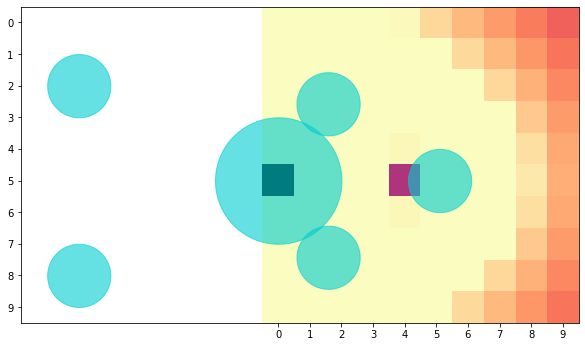

In [36]:
fig,ax = plt.subplots()
fig.set_size_inches(nx,ny)


#określenie macieży rysowanej:
final = admat(magnets)
final = np.array([np.array(ms) for ms in final])


#skalowanie potęgowe - żeby poprawić widoczność, równie dobrze można określić cmap potęgową.
im = ax.imshow((final**2)**(0.25/2),cmap='magma',vmax=4)#liniujemy dla lepszej widoczności
plt.xticks(np.linspace(0,nx,nx+1))
plt.yticks(np.linspace(0,nx,nx+1))
#rysowanie magnesów:
for m in magnets:
    srodek=[m.x,m.y]

    x = np.linspace(m.y-m.R,m.y+m.R,1000)
    xx = np.linspace(-m.R,m.R,1000)
    y = m.x-np.sqrt(m.R**2-xx**2)
    y2 = m.x+np.sqrt(m.R**2-xx**2)

    plt.fill_between(x,y,y2,alpha=0.6,color='darkturquoise')